# Домашнее задание №3 по Инфопоиску 

## Задание №1 Фильмы

**Напишите запрос, который выведет имена всех актёров, снимавшихся в фильме "Маска" ("The Mask").**

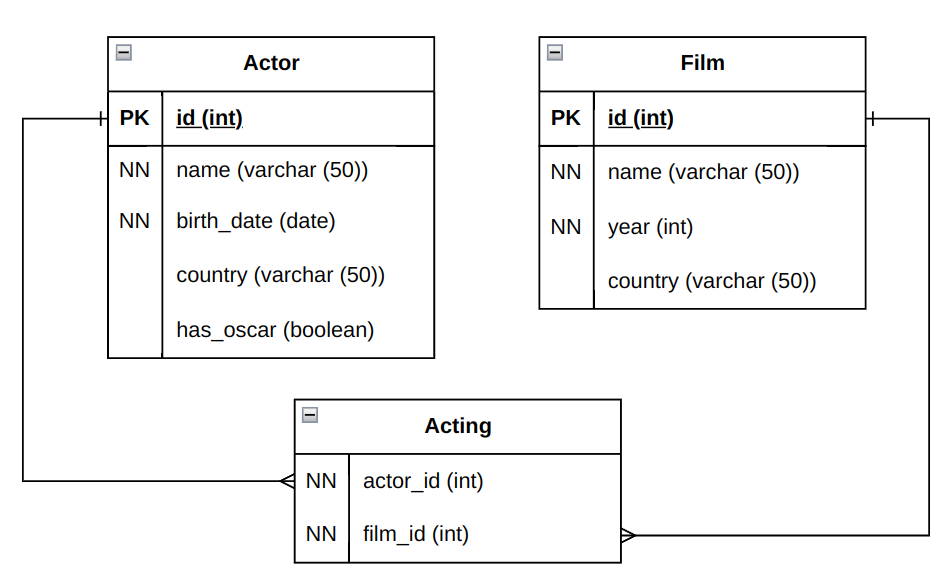

In [1]:
# Импортируем нужные библиотеки
import mysql.connector

In [2]:
# Создадим базу данных
dataBase = mysql.connector.connect(
  host ="localhost",
  user ="abinakukanova",
  passwd ="Pukataka1517!"
)
 
mycursor = dataBase.cursor()
mycursor.execute("DROP DATABASE IF EXISTS movies_db")
mycursor.execute("CREATE DATABASE movies_db")

In [3]:
# Подключим базу данных
mydb = mysql.connector.connect(
	host="localhost",
	user="abinakukanova",
	password="Pukataka1517!",
	database = "movies_db"
)

cursor = mydb.cursor()

In [4]:
sql = """
CREATE TABLE Actor (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(50) NOT NULL,
    birth_date DATE NOT NULL,
    country VARCHAR(50) NOT NULL,
    has_oscar BOOLEAN NOT NULL
);
"""
cursor.execute(sql)
print('Table Actor created successfully.')

mydb.commit()

Table Actor created successfully.


In [5]:
sql = """
CREATE TABLE Film (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(50) NOT NULL,
    year INT NOT NULL,
    country VARCHAR(50) NOT NULL
);
"""
cursor.execute(sql)
print('Table Film created successfully.')

mydb.commit()

Table Film created successfully.


In [6]:
sql = """
CREATE TABLE Acting (
    actor_id INT NOT NULL,
    film_id INT NOT NULL,
    PRIMARY KEY (actor_id, film_id),
    FOREIGN KEY (actor_id) REFERENCES Actor(id) ON DELETE CASCADE,
    FOREIGN KEY (film_id) REFERENCES Film(id) ON DELETE CASCADE
);
"""
cursor.execute(sql)
print('Table Acting created successfully.')

mydb.commit()

Table Acting created successfully.


**Вставим несколько примеров в таблицу `Actor`**

In [7]:
actors_data = [
    ('Jim Carrey', '1962-01-17', 'Canada', False),
    ('Cameron Diaz', '1972-08-30', 'USA', False),
    ('Kate Winslet', '1975-10-05', 'Great Britain', True),
    ('Adam Sandler', '1966-09-09', 'USA', False)
]

In [8]:
sql = "INSERT INTO Actor (name, birth_date, country, has_oscar) VALUES (%s, %s, %s, %s)"

cursor.executemany(sql, actors_data)
mydb.commit()
 
print(cursor.rowcount)

4


**Вставим несколько примеров в таблицу `Film`**

In [9]:
movies_data = [
    ('The Mask', 1994, 'USA'),
    ('Dumb and Dumber', 1994, 'USA'),
    ('Eternal Sunshine of the Spotless Mind', 2004, 'USA'), 
    ('Just Go with It', 2011, 'USA')
]

In [10]:
sql = "INSERT INTO Film (name, year, country) VALUES (%s, %s, %s)"

cursor.executemany(sql, movies_data)
mydb.commit()
 
print(cursor.rowcount)

4


**Вставим несколько фильмов в таблицу `Acting`**

In [11]:
acting_data = [
    (1, 1), # Jim Carrey в "The Mask"
    (2, 1), # Cameron Diaz в "The Mask"
    (1, 2), # Jim Carrey в "Dumb and Dumber"
    (3, 3), # Kate Winslet в "Eternal Sunshine of the Spotless Mind"
    (4, 4)  # Adam Sandler в "Just Go with It"
]

In [12]:
sql = "INSERT INTO Acting (actor_id, film_id) VALUES (%s, %s)"
cursor.executemany(sql, acting_data)
mydb.commit()
 
print(cursor.rowcount)

5


**Напишите запрос, который выведет имена всех актёров, снимавшихся в фильме "Маска" ("The Mask").**

In [13]:
sql = """
      SELECT Actor.name FROM Actor
      JOIN Acting ON Actor.id = acting.actor_id
      JOIN Film ON Acting.film_id = Film.id
      WHERE Film.name = 'The Mask';
"""

cursor.execute(sql)

myresult = cursor.fetchall()

for x in myresult:
  print(x)

('Jim Carrey',)
('Cameron Diaz',)


## Задача №2 Каршеринг

**Необходимо написать запрос, который выведет информацию обо всех имеющихся машинах в базе данных и их статусе.**

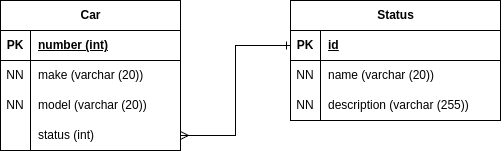

In [14]:
# Создадим базу данных
mycursor.execute("DROP DATABASE IF EXISTS carsharing_db")
mycursor.execute("CREATE DATABASE carsharing_db")

In [15]:
# Подключим базу данных
car_db = mysql.connector.connect(
	host="localhost",
	user="abinakukanova",
	password="Pukataka1517!",
	database = "carsharing_db"
)

cr = car_db.cursor()

In [16]:
sql = """
CREATE TABLE Status (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(20) NOT NULL,
    description VARCHAR(255) NOT NULL
);
"""
cr.execute(sql)
print('Table Status created successfully.')

car_db.commit()

Table Status created successfully.


In [17]:
sql = """
CREATE TABLE Car (
    number INT PRIMARY KEY,
    make VARCHAR(20) NOT NULL,
    model VARCHAR(20) NOT NULL,
    status INT NOT NULL,
    FOREIGN KEY (status) REFERENCES Status(id) ON DELETE CASCADE
);
"""
cr.execute(sql)
print('Table Car created successfully.')

car_db.commit()

Table Car created successfully.


**Добавим несколько примеров в таблицу `Status`**

In [18]:
status_data = [
    ('Available', 'The car is available for use'),
    ('In Repair', 'The car is currently under maintenance'),
    ('Reserved', 'The car is reserved for a customer')
]

In [19]:
sql = "INSERT INTO Status (name, description) VALUES (%s, %s)"

cr.executemany(sql, status_data)
car_db.commit()
 
print(cr.rowcount)

3


**Добавим несколько примеров в таблицу `Car`**

In [20]:
cars_data = [
    (1, 'Toyota', 'Corolla', 1), # Available
    (2, 'Honda', 'Civic', 2),   # In Repair
    (3, 'Ford', 'Focus', 3)    # Reserved
]

In [21]:
sql = "INSERT INTO Car (number, make, model, status) VALUES (%s, %s, %s, %s)"

cr.executemany(sql, cars_data)
car_db.commit()
 
print(cr.rowcount)

3


**Необходимо написать запрос, который выведет информацию обо всех имеющихся машинах в базе данных и их статусе.**

In [22]:
sql = """
      SELECT Car.make, Car.model, Status.name, Status.description FROM Car
      JOIN Status ON Car.status = Status.id
"""

cr.execute(sql)

myresult = cr.fetchall()

for x in myresult:
  print(x)

('Toyota', 'Corolla', 'Available', 'The car is available for use')
('Honda', 'Civic', 'In Repair', 'The car is currently under maintenance')
('Ford', 'Focus', 'Reserved', 'The car is reserved for a customer')


## Задача №3 Сотрудники

### Запрос (2 балла)
Напишите запрос, который выдаст имена сотрудников из каждого отдела, зарплата которых выше средней в отделе (2 балла).

### Процедура (2 балла)
1) Напишите процедуру `get_department_info`, которая отобразит данные о количестве сотрудников по департаментам, имеющих зарплату больше указанной цифры входного параметра. Входной параметр назовите `salary_value`. Напишите код вызова процедуры с любым значением входного параметра (1 балл)
2) Представьте ситуацию: в одном из департаментов числится один сотрудник, и его зарплата оказывается меньше заданного параметра. Как поведёт себя написанный Вами запрос? Напоминаю, что нужна информация о количестве сотрудников в каждом департменте. Если запрос что-то не обрабатывает, попробуйте придумать, как это исправить (1 балл)

### Функция (1 балл)
1) Напишите функцию `get_salary_info`, которая будет возвращать суммарную зарплату по отделу, который укажет пользователь. Входной параметр назовите `department_value`, выходной -- `salary_value`. Напишите код вызова функции с любым значением входного параметра (1 балл)

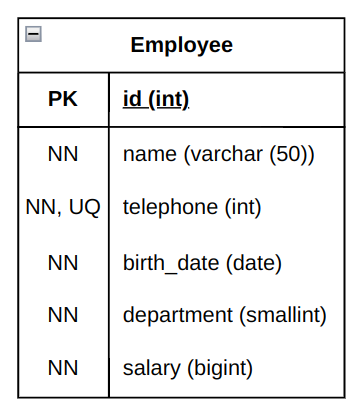

In [23]:
# Создадим базу данных
mycursor.execute("DROP DATABASE IF EXISTS employee_db")
mycursor.execute("CREATE DATABASE employee_db")

In [24]:
# Подключим базу данных
employee_db = mysql.connector.connect(
	host="localhost",
	user="abinakukanova",
	password="Pukataka1517!",
	database = "employee_db"
)

cur = employee_db.cursor()

In [25]:
sql = """
CREATE TABLE Employee (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(50) NOT NULL,
    telephone INT NOT NULL UNIQUE,
    birth_date DATE NOT NULL,
    department SMALLINT NOT NULL,
    salary BIGINT NOT NULL
);
"""
cur.execute(sql)
print('Table Employee created successfully.')

employee_db.commit()

Table Employee created successfully.


In [26]:
employee_data = [
    ('Alice Johnson', 1234567890, '1990-01-15', 1, 80000),
    ('Bob Smith', 1234567894, '1985-03-22', 2, 95000),
    ('Charlie Brown', 1234567893, '1992-07-09', 1, 72000),
    ('Diana Adams', 1234567891, '1988-11-30', 3, 88000),
    ('Ethan White', 1234567892, '1995-06-18', 2, 60000)
]

In [27]:
sql = "INSERT INTO Employee (name, telephone, birth_date, department, salary) VALUES  (%s, %s, %s, %s, %s)"

cur.executemany(sql, employee_data)
employee_db.commit()
 
print(cur.rowcount)

5


**Напишите запрос, который выдаст имена сотрудников из каждого отдела, зарплата которых выше средней в отделе**

In [28]:
sql = """
SELECT Employee.name FROM Employee
JOIN (SELECT department, AVG(salary) as avg_salary FROM Employee GROUP BY DEPARTMENT) as avg_salaries
ON avg_salaries.department = Employee.department
WHERE Employee.salary > avg_salaries.avg_salary
"""

cur.execute(sql)

myresult = cur.fetchall()

for x in myresult:
  print(x)

('Alice Johnson',)
('Bob Smith',)


**Процедура 1**

Напишите процедуру get_department_info, которая отобразит данные о количестве сотрудников по департаментам, имеющих зарплату больше указанной цифры входного параметра. Входной параметр назовите salary_value. Напишите код вызова процедуры с любым значением входного параметра

In [29]:
cur.execute("DROP PROCEDURE IF EXISTS get_department_info")
sql = """
        CREATE PROCEDURE get_department_info (salary_value INT)
        BEGIN
            SELECT department, COUNT(Employee.name) FROM Employee
            WHERE Employee.salary > salary_value
            GROUP BY Employee.department;
        END;
"""
cur.execute(sql)
employee_db.commit()

In [30]:
salary_value = 90000
cur.callproc('get_department_info', [salary_value])
for result in cur.stored_results():
    for row in result.fetchall():
        print(f'Department{row[0]}, Employee Count {row[1]}')

Department2, Employee Count 1


**Процедура 2**

Наша функция не выведет в результате данные по департаментам, если нет сотрудников в отделе, чья зарплата будет меньше указанного значения `salary_value`. Это происходит из-за того, что фильтр с WHERE исключает такие записи. Перепишем функцию

In [31]:
cur.execute("DROP PROCEDURE IF EXISTS get_department_info")
sql = """
        CREATE PROCEDURE get_department_info (salary_value INT)
        BEGIN
            SELECT department, SUM(CASE WHEN salary > salary_value THEN 1 ELSE 0 END) 
            FROM Employee
            GROUP BY department;
        END;
"""
cur.execute(sql)
employee_db.commit()

In [33]:
salary_value = 90000
cur.callproc('get_department_info', [salary_value])
for result in cur.stored_results():
    for row in result.fetchall():
        print(f'Department{row[0]}, Employee Count {row[1]}')

Department1, Employee Count 0
Department2, Employee Count 1
Department3, Employee Count 0


**Функция** `get_salary_info`

Напишите функцию get_salary_info, которая будет возвращать суммарную зарплату по отделу, который укажет пользователь. Входной параметр назовите department_value, выходной -- salary_value. Напишите код вызова функции с любым значением входного параметра (1 балл)

In [34]:
cur.execute("DROP PROCEDURE IF EXISTS get_salary_info")
sql = """
        CREATE PROCEDURE get_salary_info (department_info INT)
        BEGIN
            SELECT SUM(salary) FROM Employee
            GROUP BY department
            HAVING department = department_info;
        END;
"""
cur.execute(sql)
employee_db.commit()

In [40]:
department_info = 2
cur.callproc('get_salary_info', [department_info])
for result in cur.stored_results():
    print(result.fetchall()[0][0])

155000


**Дополнительный вопрос**

Мы говорили о том, что SQL процедуры -- это именованный набор операций, который обычно ничего не возвращает. Так ли это в контексте диалекта MySQL? Если нет, то найдите способ и опишите его словами или приведите пример (2 балла)

**Ответ:**

Есть три параметра у хранимых процедур в MySQL. По дефолту используется параметр `IN` и при вызове процедуры подаются аргументы. Два других параметра возвращают:
- Параметр OUT: его новое значение будет передано обратно в оператор call.
- Параметр INOUT: оператор call может передать аргумент, а хранимая процедура может изменить это значение и передать его обратно в оператор call.

Приведем пример с параметром OUT

In [44]:
cur.execute("DROP PROCEDURE IF EXISTS get_salary_info")
sql = """
CREATE PROCEDURE get_salary_info (IN department_info INT, OUT total_salary BIGINT)
BEGIN
    SELECT SUM(salary) INTO total_salary
    FROM Employee
    WHERE department = department_info;
END;
"""
cur.execute(sql)
employee_db.commit()

In [47]:
department_info = 2
cur.callproc("get_salary_info", (department_info,"SELECT @total_salary"))

(2, 155000)